In [2]:
import pandas as pd
!pip install pystan
!pip install fbprophet
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot,plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation,performance_metrics



In [3]:
PATH= "/content/drive/MyDrive/Time Series Analysis/Covid 19 Analysis & Prediction/Data Sets/covid_19_clean_complete.csv"
LINK = "https://drive.google.com/file/d/1dkVD-vqyrmjZkfGdHPJnzy5tGVe4a6zA/view?usp=sharing"
df =  pd.read_csv(PATH)

In [4]:
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.06080,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.41610,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.06910,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.47350,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.86880,151.209300,2020-01-22,0,0,0,0,Western Pacific


In [5]:
df.tail(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49058,NaN,Malawi,-13.254300,34.301500,2020-07-27,3664,99,1645,1920,Africa
49059,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-07-27,13,0,13,0,Europe
49060,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-07-27,4,0,1,3,Europe
49061,NaN,South Sudan,6.877000,31.307000,2020-07-27,2305,46,1175,1084,Africa
49062,NaN,Western Sahara,24.215500,-12.885800,2020-07-27,10,1,8,1,Africa
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

In [8]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
by_date =  df.groupby(['Date'])["Confirmed","Deaths","Recovered","Active"].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [11]:
by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Confirmed  188 non-null    int64         
 2   Deaths     188 non-null    int64         
 3   Recovered  188 non-null    int64         
 4   Active     188 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.5 KB


In [12]:
df_prophet = by_date.rename(columns={"Date":"ds","Confirmed":"y"})

In [13]:
df_prophet.head(10)

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
5,2020-01-27,2927,82,61,2784
6,2020-01-28,5578,131,107,5340
7,2020-01-29,6166,133,125,5908
8,2020-01-30,8234,171,141,7922
9,2020-01-31,9927,213,219,9495


In [14]:
df_prophet.tail(10)

,ds,y,Deaths,Recovered,Active
178,2020-07-18,14292198,602130,7944550,5745518
179,2020-07-19,14506845,606159,8032235,5868451
180,2020-07-20,14713623,610319,8190777,5912527
181,2020-07-21,14947078,616557,8364986,5965535
182,2020-07-22,15227725,623540,8541255,6062930
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711
187,2020-07-27,16480485,654036,9468087,6358362


In [15]:
model = Prophet().fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

In [17]:
future_df = model.make_future_dataframe(periods=30,freq="D")
future_df.head(10)

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [18]:
future_df.tail(10)

,ds
208,2020-08-17
209,2020-08-18
210,2020-08-19
211,2020-08-20
212,2020-08-21
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


In [19]:
prediction = model.predict(future_df)
prediction[["yhat","yhat_lower"	,"yhat_upper"]]

,yhat,yhat_lower,yhat_upper
0,-2.030360e+04,-1.142612e+05,8.753262e+04
1,-7.727307e+03,-1.178690e+05,9.098767e+04
2,6.127475e+03,-9.944970e+04,1.106141e+05
3,1.249814e+04,-9.447375e+04,1.136032e+05
4,8.746118e+03,-9.432152e+04,1.184864e+05
...,...,...,...
213,2.145538e+07,2.111268e+07,2.189333e+07
214,2.165304e+07,2.129132e+07,2.209602e+07
215,2.184773e+07,2.146568e+07,2.230843e+07
216,2.203715e+07,2.161821e+07,2.251645e+07


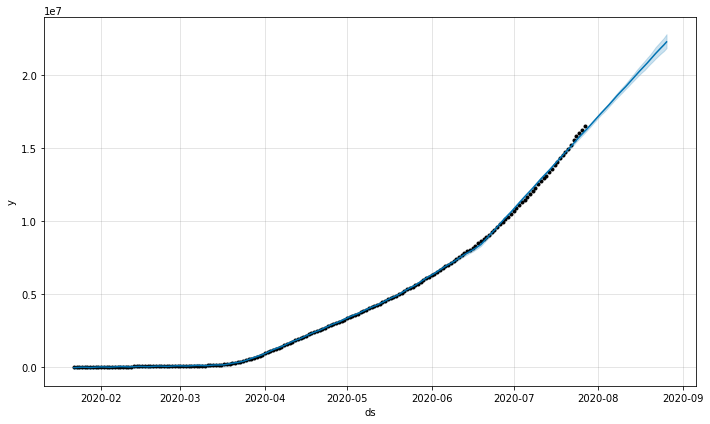

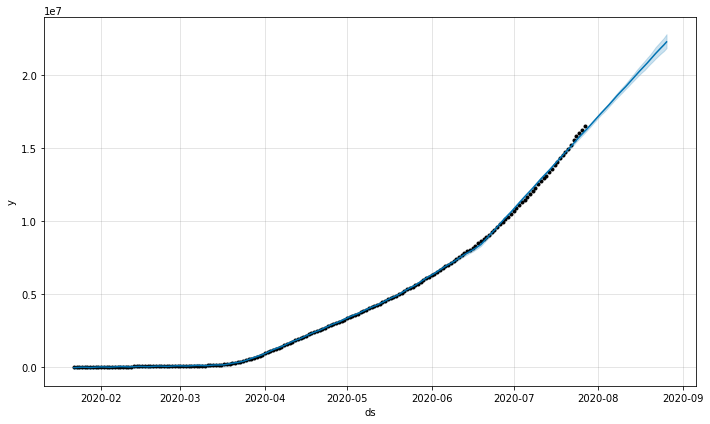

In [20]:
model.plot(prediction)

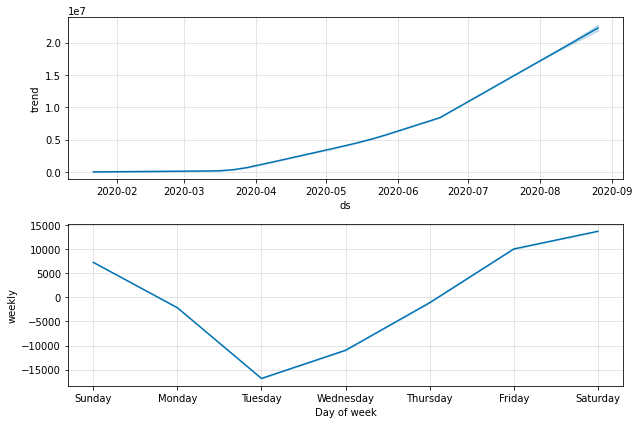

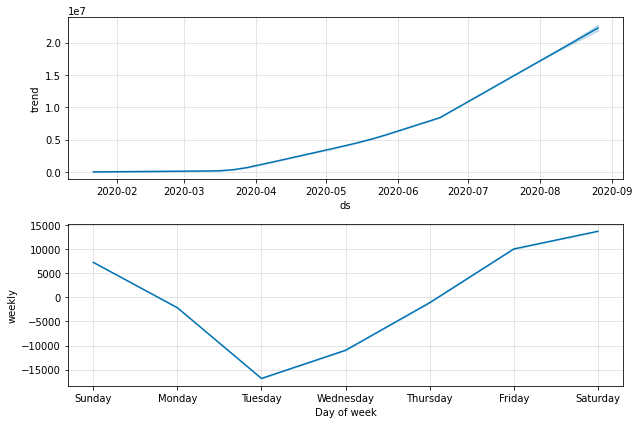

In [21]:
model.plot_components(prediction)

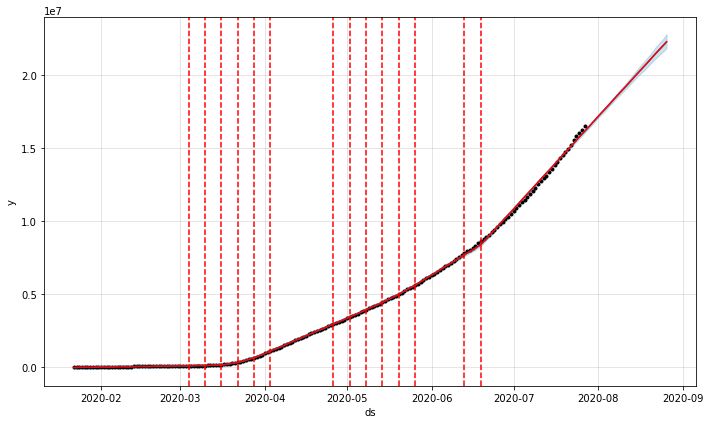

In [22]:
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)

In [23]:
cross_df = cross_validation(model,horizon="30 days",period="15 days",initial="90 days")

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [24]:
cross_df.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195990e+06,3.206110e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279316e+06,3.292051e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361653e+06,3.378428e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439627e+06,3.461705e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513214e+06,3.547041e+06,3515244,2020-04-28
5,2020-05-04,3.607767e+06,3.584902e+06,3.630263e+06,3591321,2020-04-28
6,2020-05-05,3.686387e+06,3.656144e+06,3.715172e+06,3671310,2020-04-28
7,2020-05-06,3.766963e+06,3.727499e+06,3.804943e+06,3761332,2020-04-28
8,2020-05-07,3.851332e+06,3.805835e+06,3.897985e+06,3850418,2020-04-28
9,2020-05-08,3.935539e+06,3.882641e+06,3.991879e+06,3941935,2020-04-28


In [25]:
df_performace = performance_metrics(cross_df)
df_performace.head(10)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000
5,8 days,1.145687e+11,338480.049995,264364.886953,0.031144,0.034933,0.200000
6,9 days,1.401535e+11,374370.785707,295662.136343,0.034329,0.038884,0.200000
7,10 days,1.688670e+11,410934.348879,326384.406909,0.037372,0.044010,0.200000
8,11 days,2.013514e+11,448721.932294,357381.844817,0.040367,0.048946,0.200000
9,12 days,2.439292e+11,493891.866007,392682.833988,0.043546,0.052090,0.200000


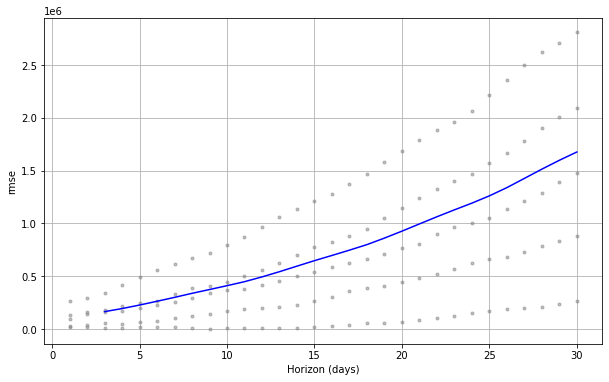

In [26]:
rmse_df=  plot_cross_validation_metric(cross_df,metric="rmse")

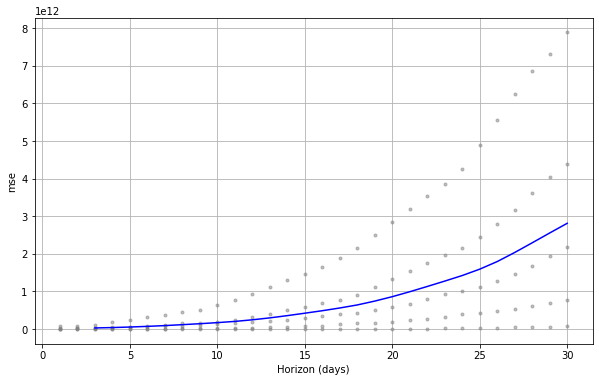

In [27]:
mse_df=  plot_cross_validation_metric(cross_df,metric="mse")

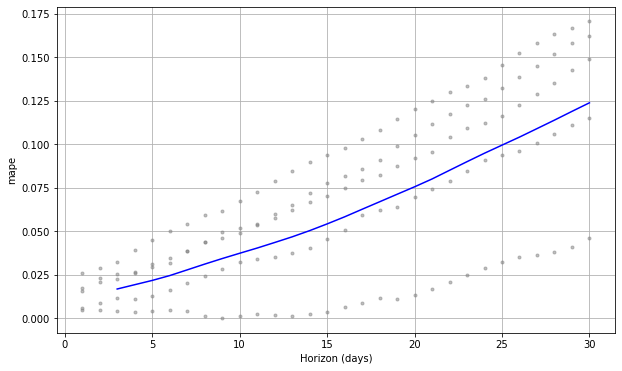

In [28]:
mape_df=  plot_cross_validation_metric(cross_df,metric="mape")